## 파이 구하기

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [31]:
N = 10000
X = np.random.uniform(low=-1.0, high=1.0, size=N)
Y = np.random.uniform(low=-1.0, high=1.0, size=N)

distance_from_zero = np.sqrt(X * X + Y * Y)
is_inside_circle = distance_from_zero <= 1

print("Estimated pi = %f" % (np.average(is_inside_circle) * 4))

Estimated pi = 3.147600


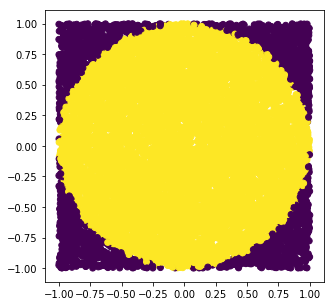

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, c=is_inside_circle)
plt.show()

## 유방암 검사 키트

In [42]:
sensitivity = 0.8
prior_prob = 0.004
false_alarm = 0.1

In [33]:
def mammogram_test(sensitivity, prior_prob, false_alarm):
    p_a1_b1 = sensitivity # p(A = 1 | B = 1)

    p_b1 = prior_prob # p(B = 1)

    p_b0 = 1 - prior_prob # p(B = 0)

    p_a1_b0 = false_alarm # p(A = 1|B = 0)

    p_a1 = (p_a1_b0 * p_b0) + (p_a1_b1 * p_b1) # p(A = 1) = p(A = 1|B = 0)P(B = 0) + P(A = 1|B = 1)P(B = 1)

    p_b1_a1 = (p_a1_b1 * p_b1) / p_a1 # p(B = 1|A = 1) = p(A = 1|B = 1)p(B = 1) / p(A = 1)

    return p_b1_a1

3.11%


In [43]:
print("%.2lf%%" % (100 * mammogram_test(sensitivity, prior_prob, false_alarm)))

3.11%


## 사탕 기계

In [40]:
M1 = {'r': 0.7, 'g': 0.2, 'b': 0.1} # M1 기계의 사탕 비율
M2 = {'r': 0.3, 'g': 0.4, 'b': 0.3} # M2 기계의 사탕 비율

test = {'r': 4, 'g': 3, 'b': 3}

In [38]:
def naive_bayes(M1, M2, test, M1_prior, M2_prior):
    p_M1 = ((M1['r'] ** test['r']) * (M1['g'] ** test['g']) * (M1['b'] ** test['b'])) * M1_prior
    p_M2 = ((M2['r'] ** test['r']) * (M2['g'] ** test['g']) * (M2['b'] ** test['b'])) * M2_prior
    
    total = p_M1 + p_M2
    
    
    return [p_M1 / total, p_M2 / total]

In [41]:
naive_bayes(M1, M2, test, 0.7, 0.3)

[0.24254275200230901, 0.757457247997691]

## Bag of Words

In [49]:
sentence = "Bag-of-Words 모델을 Python으로 직접 구현하겠습니다. 주어진 문장에 대해 Bag-of-Words 모델과 단어 사전을 만든 뒤, 단어 사전과 만들어진 bag-of-words를 같이 리턴해야 합니다."

In [50]:
import re

special_chars_remover = re.compile("[^\w'|_]")

def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

In [57]:
def create_BOW(sentence):
    bow = {}
    splitted_sentence = remove_special_characters(sentence.lower()).split()
    tokens = [token for token in splitted_sentence if len(token) >= 1]
    
    for token in tokens:
        if token not in bow:
            bow[token] = 1
        else:
            bow[token] += 1
    
    return bow

In [58]:
create_BOW(sentence)

{'bag': 3,
 'of': 3,
 'python으로': 1,
 'words': 2,
 'words를': 1,
 '같이': 1,
 '구현하겠습니다': 1,
 '단어': 2,
 '대해': 1,
 '뒤': 1,
 '리턴해야': 1,
 '만든': 1,
 '만들어진': 1,
 '모델과': 1,
 '모델을': 1,
 '문장에': 1,
 '사전과': 1,
 '사전을': 1,
 '주어진': 1,
 '직접': 1,
 '합니다': 1}